# Chapter 2 - End to End Machine Learning Project

**NOTES**

- When you are **spliting train/test**  consider the strata of your data; For classification it's more obvious using Stratified, but for regression it's also possible, and desirable to consider this step. You can create a new feature by binning the labels in categories that are large enough, and then doing the split.

- When **exploring visualisation**, create a copy of X_train not to mess the data. DO NOT USE X_test in your explorations.

- When you have no idea about the **values for the hyperparamters**, go with the power of 10, or smaller values, if you want a fine-grained search.

- When **encoding categorical features**, if the order matters, use OrdinalEncoder. If it doesnt, OneHotEncoder.


- Save the models you train with 

*sklearn.externals import joblib*

*joblib.dump(my_model, "my_model.pkl")*

*my_model_loaded = joblib.load("my_model.pkl")*

In [ ]:
# to activate the virtual ML use in the terminal
# cd <path>
# souce env/bin/activate

## 1. Load the data + quick inspect

In [70]:
import pandas as pd
import numbers as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# the function is created here as a good practice
# in an external environment you'd also need to use make of different directories, for example
def load_housing_data(housing_path="../data/housing.csv"):
    return pd.read_csv(housing_path)

# loads data
housing = load_housing_data()

# check data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# quick inspect 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# we see that the "ocean_proximity" is an object
# let's check if its values are consistent

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# describe shows a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


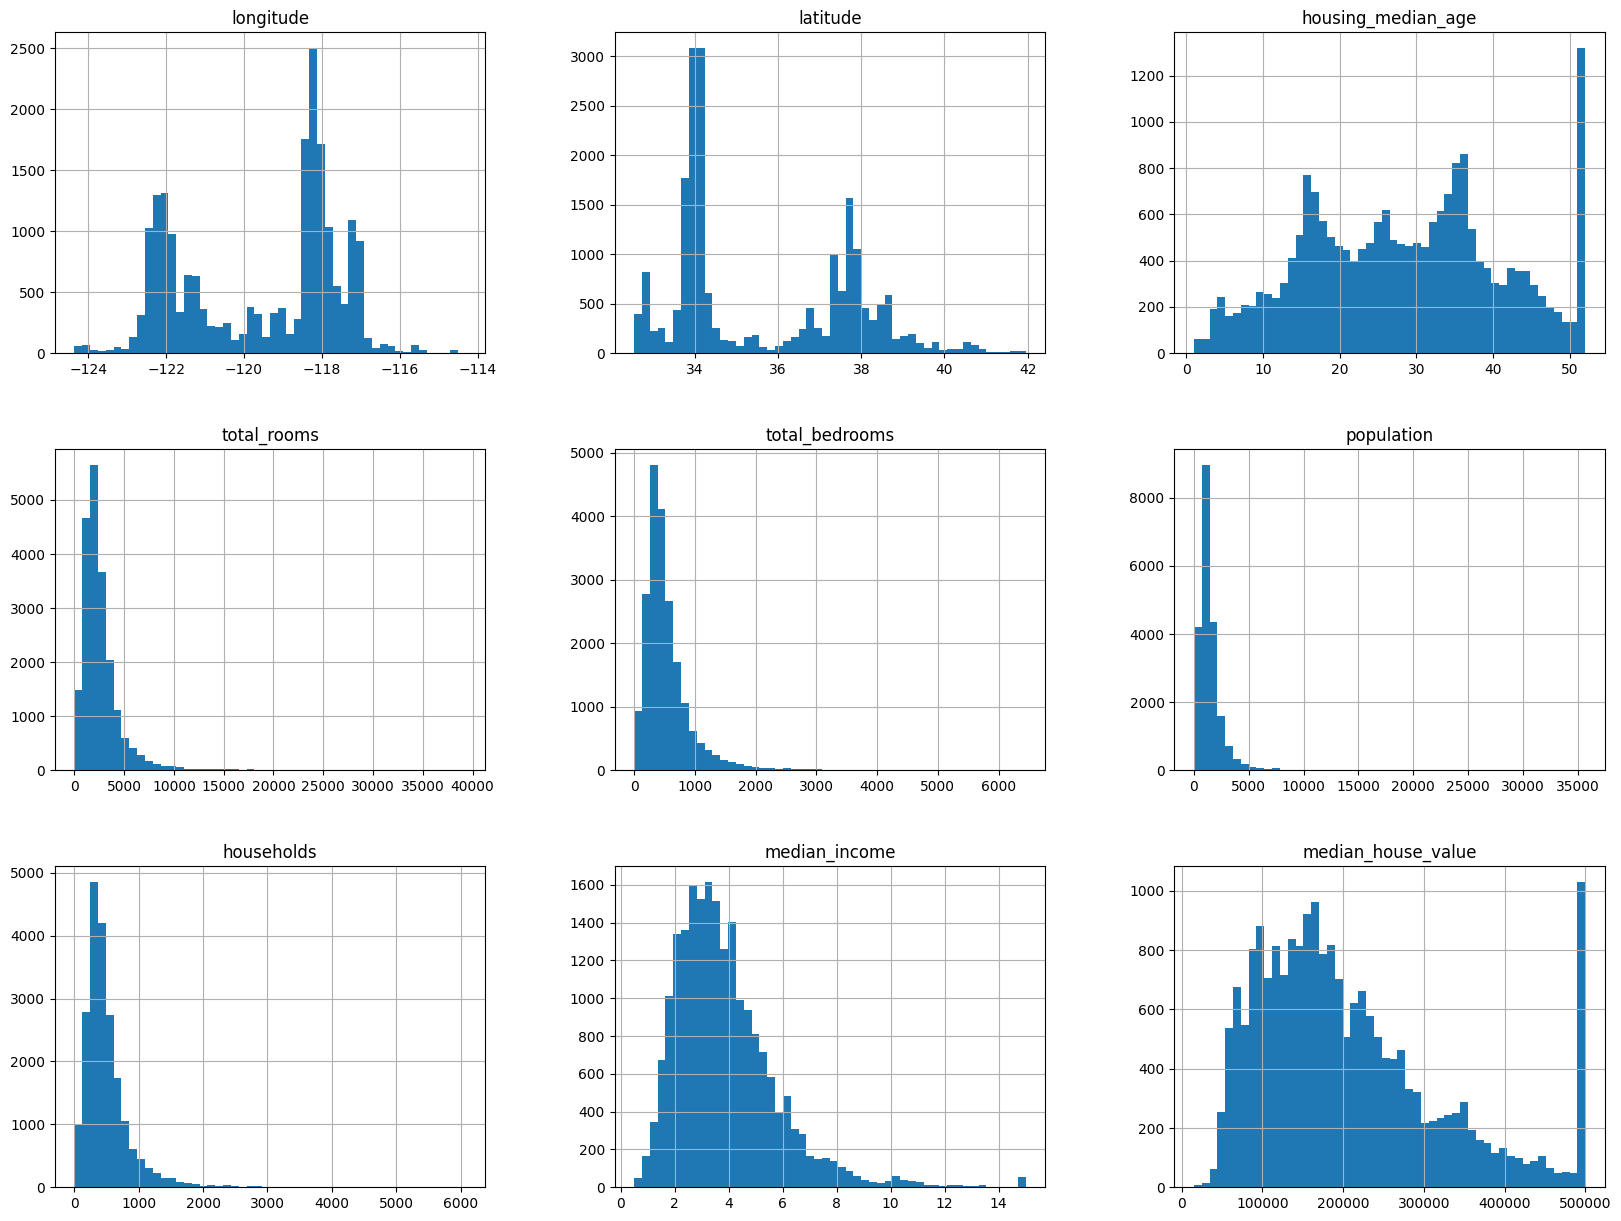

In [13]:
# the function hist() plots a histogram for all the numeric attributes
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## 2. Train and Test split

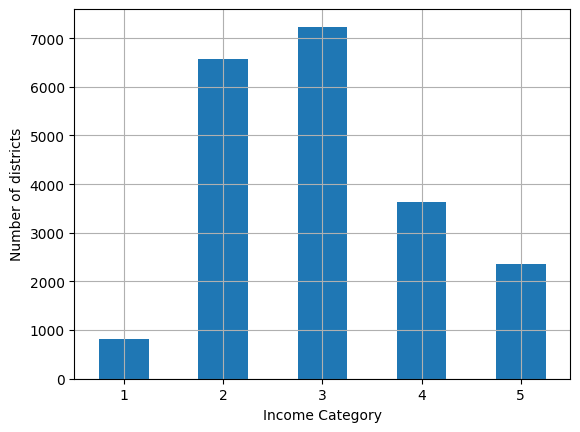

In [21]:
import math

# create a new category based on the label to ensure split will be proportional
housing["income_cat"] = pd.cut(housing["median_income"], 
                                bins=[0, 1.5, 3, 4.5, 6, math.inf],
                                labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

This looks like a normal distribution, which is fine. 
Now we will move into creating the X_test / X_train using the strata, to make sure we will have the same distribution in both groups.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=25)

## 3. Exploring the data with visualisation

In [25]:
# create a copy of X_train to play with visualisations without messing the data
housing_vis = X_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

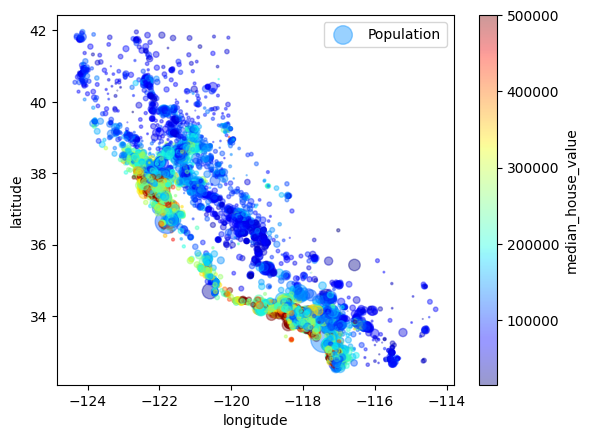

In [33]:
# Here we will plot a graph with the geographical data
# to explore where the prices are more/less expensive

housing_vis.plot(kind="scatter",  x="longitude", y= "latitude",
alpha=0.4, # alpha controls the sensity, brigher points,
s= housing_vis["population"]/100, label="Population", # s is the size of the point. Here we use scale it to show density 
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # the jet uses the predefined palette 

In [35]:
# Checking  the correlations
correlation_matrix = housing_vis.corr(numeric_only=True)

# Display correlation of "median_house_value" and other features
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688299
total_rooms           0.135386
housing_median_age    0.107566
households            0.068105
total_bedrooms        0.051978
population           -0.021335
longitude            -0.038710
latitude             -0.150855
Name: median_house_value, dtype: float64

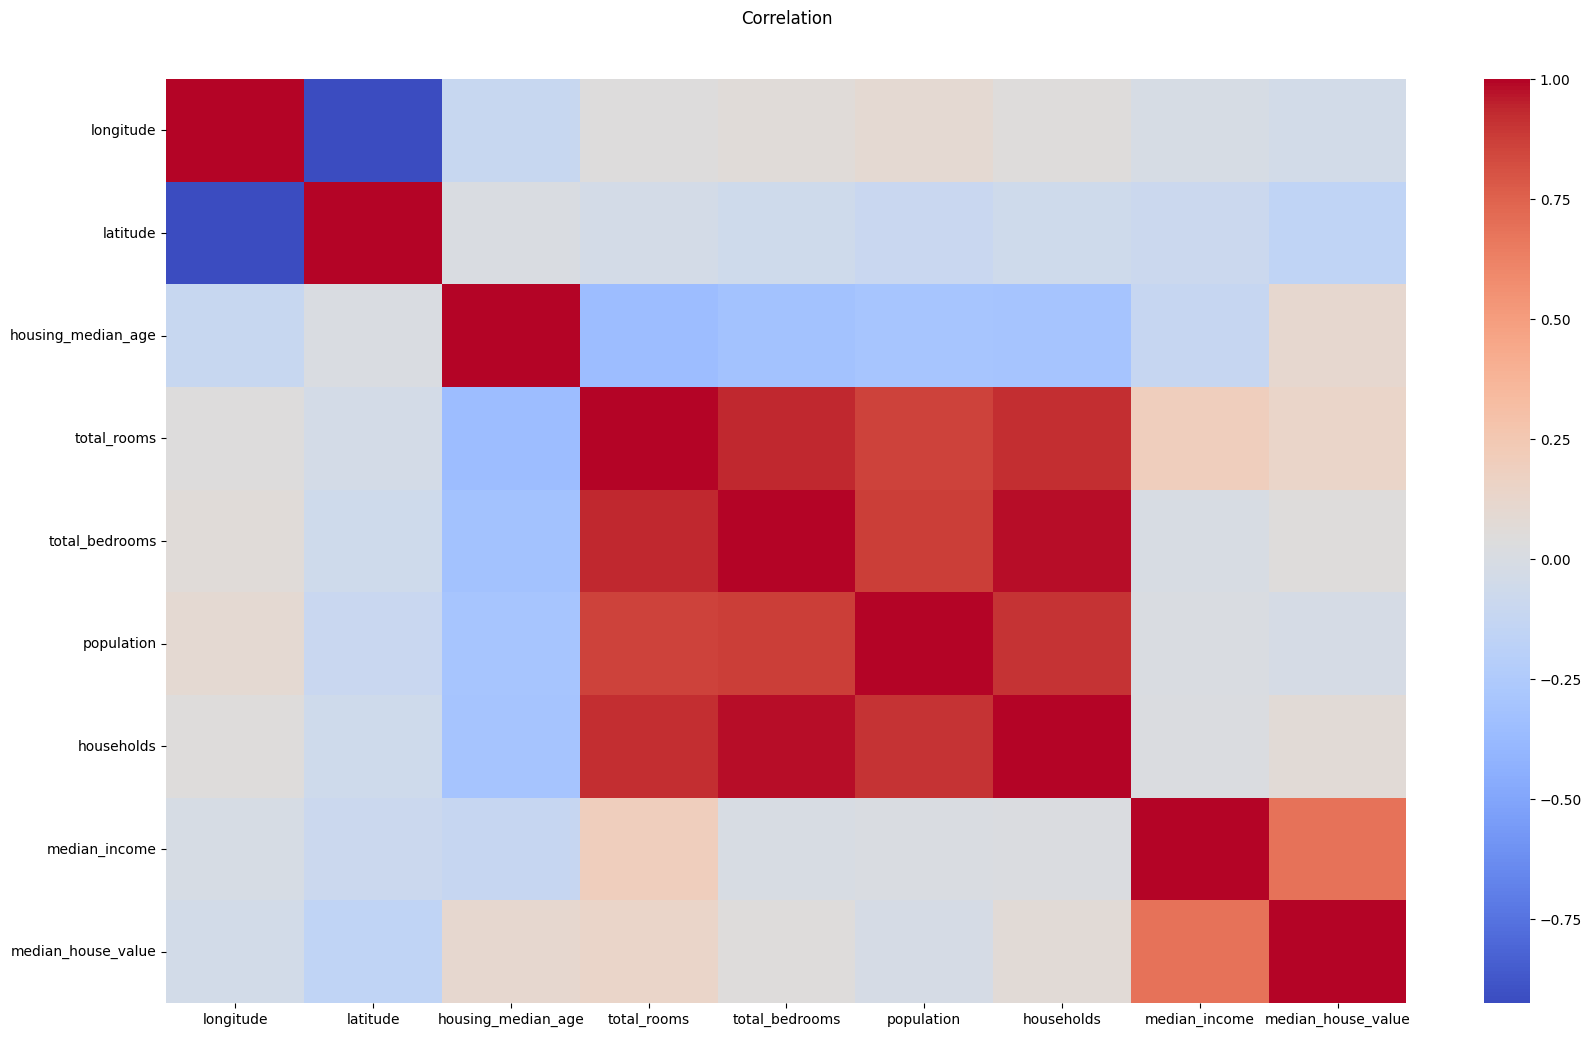

In [37]:
#plot correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation', pad=40)
plt.show()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

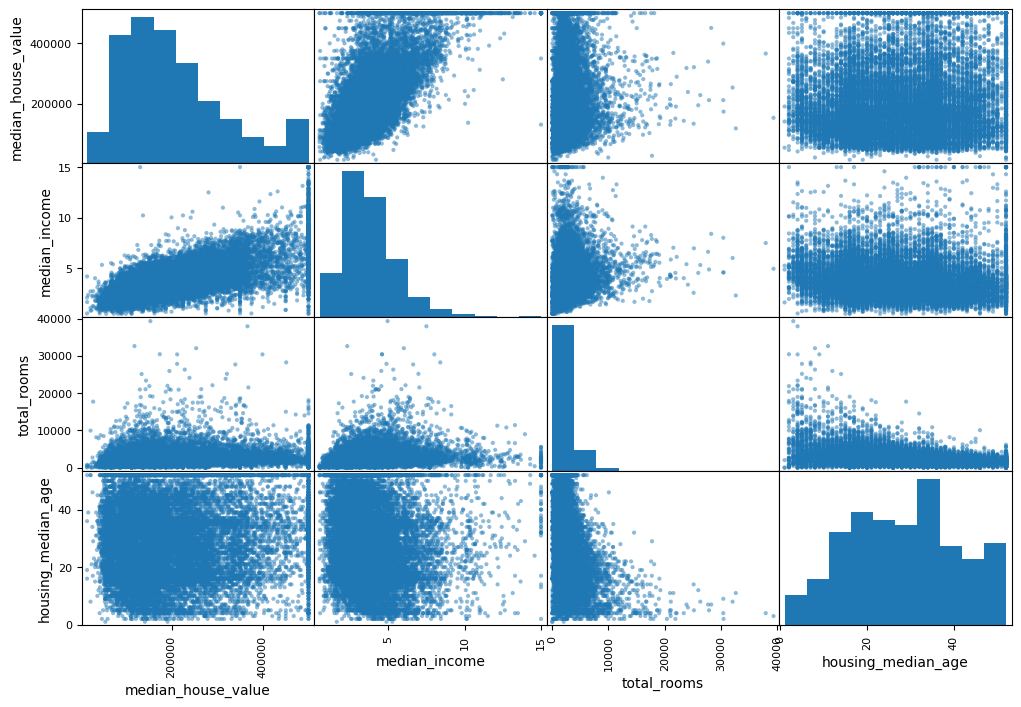

In [39]:
# another way to plot correlations
# select here only the most promising attributes otherwise it won't fit on the page

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing_vis[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

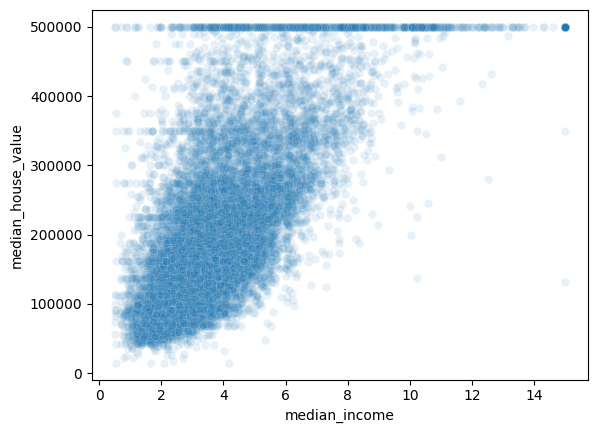

In [41]:
# Let's plot the scatter for median_income and median_house_value
# since this is the most promissing feature

sns.scatterplot(data=housing_vis, x="median_income", y="median_house_value", alpha=0.1)

# we will see that there's a cap at 500000 - there are no houses more expensive than this value
# this could have been a mistake from where you got your data, you'd need to check with your team
# the impact of this;


## 4. Feature engineering

In [43]:
# the number of total rooms per district may not make sense, but the average
# rooms per household is a better metric
housing_vis["rooms_per_household"] = housing_vis["total_rooms"]/housing_vis["households"]

# likewise, the median of total bedrooms per household
housing_vis["bedrooms_per_household"] = housing_vis["total_bedrooms"]/housing_vis["total_rooms"]

# and the average number of people per household
housing_vis["population_per_household"] = housing_vis["population"] / housing_vis["households"]

# check the correlation matrix again, with the new attributes
correlation_matrix = housing_vis.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=(False))

median_house_value          1.000000
median_income               0.688299
rooms_per_household         0.145758
total_rooms                 0.135386
housing_median_age          0.107566
households                  0.068105
total_bedrooms              0.051978
population                 -0.021335
population_per_household   -0.022351
longitude                  -0.038710
latitude                   -0.150855
bedrooms_per_household     -0.255825
Name: median_house_value, dtype: float64

## 5. Preparing the data for ML Algorithms

In [45]:
# first we create a copy of X_train
# and then the y_train

X_train_cleaned = X_train.drop("median_house_value", axis=1) # this does not affect X_train
y_train = X_train["median_house_value"].copy()

### 5.1 Treating null values

For numeric values, you have three options:
- Dropna (ie *df.dropna(subset=[features]*))
- Drop feature (ie *df.drop, axis=1*)
- Fill with median (ie *df[feature].fillna(media, inplace=True)*). **If you do this option, you need to use the same value on the missing values in the test set**.

**IF YOU HAVE MANY MISSING VALUES** a better solution is to use a SimpleImputer from sklearn

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# you have to separate numerical and categorical
X_train_cleaned_num = X_train_cleaned.select_dtypes(include="float64")

# fit the data on the imputer
imputer.fit(X_train_cleaned_num)

X_train_model = imputer.transform(X_train_cleaned_num)

# if you want to see the array with the median values
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2136.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [55]:
X_train_model

array([[-118.43  ,   34.28  ,   30.    , ..., 2054.    ,  301.    ,
           3.0132],
       [-118.05  ,   34.05  ,   36.    , ...,  920.    ,  199.    ,
           3.7279],
       [-121.89  ,   37.45  ,   15.    , ..., 1687.    ,  519.    ,
           4.75  ],
       ...,
       [-121.26  ,   38.73  ,   14.    , ..., 1527.    ,  540.    ,
           5.3451],
       [-121.07  ,   38.66  ,   22.    , ...,  813.    ,  269.    ,
           4.6394],
       [-118.07  ,   34.15  ,   45.    , ...,  672.    ,  234.    ,
           3.4087]])

### 5.2 Dropping outliers

In [56]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X_train_model)

outlier_pred


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# to drop outliers, run the code below

#X_train_model = X_train_model.iloc[outlier_pred==1]
#y_train = y_train.iloc[outlier_pred==1]

### 5.3 Handling categorical data

In [59]:
X_train_cat = X_train_cleaned.select_dtypes(include="object")

# here the order for the only cat doesn't matter, so I will use one hot encoder

In [65]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat)

print(X_train_cat_encoded[:10])

  (np.int32(0), np.int32(0))	1.0
  (np.int32(1), np.int32(0))	1.0
  (np.int32(2), np.int32(0))	1.0
  (np.int32(3), np.int32(1))	1.0
  (np.int32(4), np.int32(1))	1.0
  (np.int32(5), np.int32(0))	1.0
  (np.int32(6), np.int32(0))	1.0
  (np.int32(7), np.int32(0))	1.0
  (np.int32(8), np.int32(4))	1.0
  (np.int32(9), np.int32(4))	1.0


In [66]:
# I can see the categories of the encoder with
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 5.4 Custom transformers

In [69]:
# this is how you create a custom transformer
# this is useful to tune parameters in the pipeline / grid automatically
# for example, seeing if the custom features will help or not in the final model

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# to use the class, and add extra attributes dynamically you'd run
# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
# to create a simple transformer
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

### 5.5 Transformation Pipelines

In [125]:
# example of a simple pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # CombinedAttributesAdder is giving an error with get_features_name_out
    # potentially fix with FeatureUnion
    # check later
   # ("attributes_adder", CombinedAttributesAdder()), 
    ("standard_scalter", StandardScaler())
])

X_train_num = num_pipeline.fit_transform(X_train_cleaned_num)

In [126]:
numeric_features 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [127]:
# example of a pipeline considering numeric and categorical
from sklearn.compose import ColumnTransformer

# you need to pass a list of strings or indices
numeric_features = X_train_cleaned.select_dtypes(include=np.number).columns 
categorical_features = X_train_cleaned.select_dtypes(include="object").columns

preprocessing_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, numeric_features), # note here that we use the numerical pipeline previously stablished 
    ("categorical", OneHotEncoder(), categorical_features),
])

X_train_ready = preprocessing_pipeline.fit_transform(X_train_cleaned)

## 6. Selecting and Training a model

In [128]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_ready, y_train)

LinearRegression()

In [129]:
from sklearn.metrics import mean_squared_error
# let's check the MSE
housing_predictions = lin_reg.predict(X_train_ready)
lin_reg_mse = mean_squared_error(y_train, housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)

print(f"RMSE train: {lin_reg_rmse}")

RMSE train: 68663.96711905111


### 6.1 Better evaluatiom using CV

In [130]:
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(lin_reg, X_train_ready, y_train, scoring="neg_root_mean_squared_error", cv=10)

# Here you can see not only the scores from the folds, but also their mean and std
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(scores)

Scores:  [69817.18447769 64246.84422952 65338.73619295 71684.40842744
 68110.65827073 66762.01806776 71495.28325587 71943.01362408
 70778.7437786  68060.23539339]
Mean:  68823.71257180312
Standard deviation:  2613.3265285931548


### 6.3 Using GridSearch

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


full_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

parameter_grid = [
    # this is combo 1, first tries this combinations
    {
        "random_forest__n_estimators":[3, 10, 30],
        "random_forest__max_features": [4, 6]
    },

    # then is moves to combo 2, to try these combinations
    {
        #"random_forest__boostrap": [False],
        "random_forest__max_features": [6, 8]
    }
]

grid_search= GridSearchCV(full_pipeline, parameter_grid, cv=3, scoring = "neg_root_mean_squared_error")

grid_search.fit(X_train_cleaned, y_train)

/Users/gabi/data_science/data_science/ve_ml/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard_scalter',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6],
                          'random_forest__n_estimators': [3, 10, 30]},
                         {'random_forest__max_features': [6, 8]}],
             scoring='neg_root_mean_squared_error')

In [132]:
# you can get a full list of hyperparameters to tune by looking at
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__numerical', 'preprocessing__categorical', 'preprocessing__numerical__memory', 'preprocessing__numerical__steps', 'preprocessing__numerical__verbose', 'preprocessing__numerical__imputer', 'preprocessing__numerical__standard_scalter', 'preprocessing__numerical__imputer__add_indicator', 'preprocessing__numerical__imputer__copy', 'preprocessing__numerical__imputer__fill_value', 'preprocessing__numerical__imputer__keep_empty_features', 'preprocessing__numerical__imputer__missing_values', 'preprocessing__numerical__imputer__strategy', 'preprocessing__numerical__standard_scalter__copy', 'preprocessing__numerical__standard_scalter__with_me

In [133]:
# the best hyperparameter combinations
grid_search.best_params_

{'random_forest__max_features': 8}

In [134]:
# the best estimator
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scalter',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])

In [135]:
# Looking at all the combinations and their scores
cv_combs_scores = grid_search.cv_results_

for mean_score, params in zip(cv_combs_scores["mean_test_score"], cv_combs_scores["params"]):
    print( mean_score, params)

-60218.57889033041 {'random_forest__max_features': 4, 'random_forest__n_estimators': 3}
-53099.73833797465 {'random_forest__max_features': 4, 'random_forest__n_estimators': 10}
-50908.23485984444 {'random_forest__max_features': 4, 'random_forest__n_estimators': 30}
-59119.86721843451 {'random_forest__max_features': 6, 'random_forest__n_estimators': 3}
-52762.28662423711 {'random_forest__max_features': 6, 'random_forest__n_estimators': 10}
-50683.82797600369 {'random_forest__max_features': 6, 'random_forest__n_estimators': 30}
-50062.53137125642 {'random_forest__max_features': 6}
-50018.25090423445 {'random_forest__max_features': 8}


### 6.4 Analyse best models and their errors

In [136]:
## DO NOT RUN THIS
## NEED TO FIX CombinedAttributesAdder with FeatureUnion

best_model = grid_search.best_estimator_

# Access the random forest model and preprocessing steps directly
random_forest = best_model.named_steps["random_forest"]
preprocessing = best_model.named_steps["preprocessing"]

# Get feature importances and feature names
feature_importance = random_forest.feature_importances_
feature_names = preprocessing.get_feature_names_out()

# Sort the feature importances and names together
sorted_features = sorted(zip(feature_importance, feature_names), reverse=True)

# Print or visualize the sorted features
for importance, name in sorted_features:
    print(f"{name}: {importance:.3f}")

numerical__median_income: 0.446
categorical__ocean_proximity_INLAND: 0.153
numerical__longitude: 0.111
numerical__latitude: 0.101
numerical__housing_median_age: 0.047
numerical__population: 0.038
numerical__total_rooms: 0.031
numerical__total_bedrooms: 0.027
numerical__households: 0.024
categorical__ocean_proximity_<1H OCEAN: 0.013
categorical__ocean_proximity_NEAR OCEAN: 0.006
categorical__ocean_proximity_NEAR BAY: 0.002
categorical__ocean_proximity_ISLAND: 0.000


### 6.5 Evaluate on test set

In [142]:
X_test_cleaned = X_test.drop("median_house_value", axis=1)
y_test = X_test["median_house_value"].copy()


final_predictions = best_model.predict(X_test_cleaned)
final_mse = mean_squared_error(y_test, final_predictions)

print(final_mse)


2295398919.475659


In [144]:
# It's better to show the evalution on the test set with confidence levels

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45687.14976624, 50034.80973471])

Ps: these values are really bad, but this tutorial are for demonstration only.
This is not a good model!!

## 7. Bonus section: how to choose the sampling distribution for a hyperparameter

- scipy.stats.randint(a, b+1): for hyperparameters with discrete values that range from a to b, and all values in that range seem equally likely.

- scipy.stats.uniform(a, b): this is very similar, but for continuous hyperparameters.

- scipy.stats.geom(1 / scale): for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.

- scipy.stats.expon(scale): this is the continuous equivalent of geom. Just set scale to the most likely value.

- scipy.stats.loguniform(a, b): when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.